In [ ]:
ls

'Assignment 3.ipynb'   dataset/   Flowers-Dataset.zip   flowers.h5


In [ ]:
cd//content/drive/MyDrive/Colab Notebooks/assignment3

/content/drive/MyDrive/Colab Notebooks/assignment3


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/assignment3'

IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/assignment3/dataset/training",target_size=(64,64),
                                          class_mode="categorical",batch_size=24)

Found 2308 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Colab Notebooks/assignment3/dataset/testing",target_size=(64,64),
                                          class_mode="categorical",batch_size=24)

Found 2038 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation="relu"))
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               9225900   
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 dense_8 (Dense)             (None, 5)                 1505      
                                                      

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test)//2)

Epoch 1/10
97/97 [==============================] - 94s 968ms/step - loss: 1.5064 - accuracy: 0.4138 - val_loss: 1.2037 - val_accuracy: 0.5040
Epoch 2/10
97/97 [==============================] - 101s 1s/step - loss: 1.0939 - accuracy: 0.5637 - val_loss: 1.1865 - val_accuracy: 0.5288
Epoch 3/10
97/97 [==============================] - 64s 664ms/step - loss: 1.0130 - accuracy: 0.5927 - val_loss: 1.3159 - val_accuracy: 0.4861
Epoch 4/10
97/97 [==============================] - 49s 506ms/step - loss: 0.9526 - accuracy: 0.6373 - val_loss: 1.2370 - val_accuracy: 0.5208
Epoch 5/10
97/97 [==============================] - 37s 384ms/step - loss: 0.9048 - accuracy: 0.6568 - val_loss: 1.2616 - val_accuracy: 0.5377
Epoch 6/10
97/97 [==============================] - 34s 347ms/step - loss: 0.8657 - accuracy: 0.6659 - val_loss: 1.2503 - val_accuracy: 0.5675
Epoch 7/10
97/97 [==============================] - 32s 335ms/step - loss: 0.8422 - accuracy: 0.6698 - val_loss: 1.2435 - val_accuracy: 0.5506
E

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/assignment3/flowers.h5')

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/Colab Notebooks/assignment3/flowers.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/assignment3/dataset/testing/tulip/10163955604_ae0b830975_n.jpg')

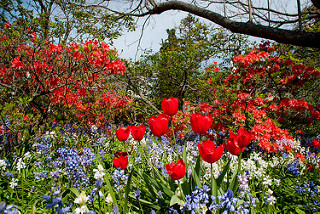

In [ ]:
img

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/assignment3/dataset/testing/tulip/10163955604_ae0b830975_n.jpg',target_size=(64,64))

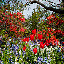

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[ 22.,  24.,  19.],
        [ 58.,  70.,  34.],
        [ 90., 157., 210.],
        ...,
        [133., 142., 151.],
        [ 10.,   9.,  14.],
        [  3.,   0.,   4.]],

       [[ 52.,  67.,  28.],
        [ 63.,  54.,  11.],
        [ 13.,  72.,  80.],
        ...,
        [160., 187., 196.],
        [ 29.,  39.,   4.],
        [  5.,   0.,   0.]],

       [[ 74., 118., 105.],
        [ 55.,  92.,  41.],
        [ 46.,  93.,  13.],
        ...,
        [ 39.,  59.,   8.],
        [ 39.,  48.,  29.],
        [ 40.,  25.,  18.]],

       ...,

       [[145., 118., 151.],
        [107., 123., 156.],
        [159., 161., 202.],
        ...,
        [ 93., 126.,  13.],
        [114., 126.,  42.],
        [  8.,   8.,  20.]],

       [[ 74.,  86., 134.],
        [217., 226., 235.],
        [138., 169.,  13.],
        ...,
        [ 42.,  56.,   0.],
        [ 81.,  76., 130.],
        [ 40.,  75.,   0.]],

       [[ 62.,  67.,  26.],
        [118., 130., 172.],
        [155., 1

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred=model.predict(x)

In [ ]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
index=['daisy','dandelion','rose','sunflower','tulip']
index[np.argmax(pred)]

'tulip'